# Fast Neural Style Transfer

This work will use available [model from Tensorflow Hub](https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2) and apply it to the images

In [4]:
import tensorflow as tf
import tensorflow_hub as hub

import matplotlib.pyplot as plt
from image_utils import *
print('tf verison: ', tf.__version__)

tf verison:  2.10.0


In [5]:
content_path = './content.JPG'
style_path = './style.jpg'

Metal device set to: Apple M2


2022-10-20 09:11:18.037064: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-20 09:11:18.037999: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


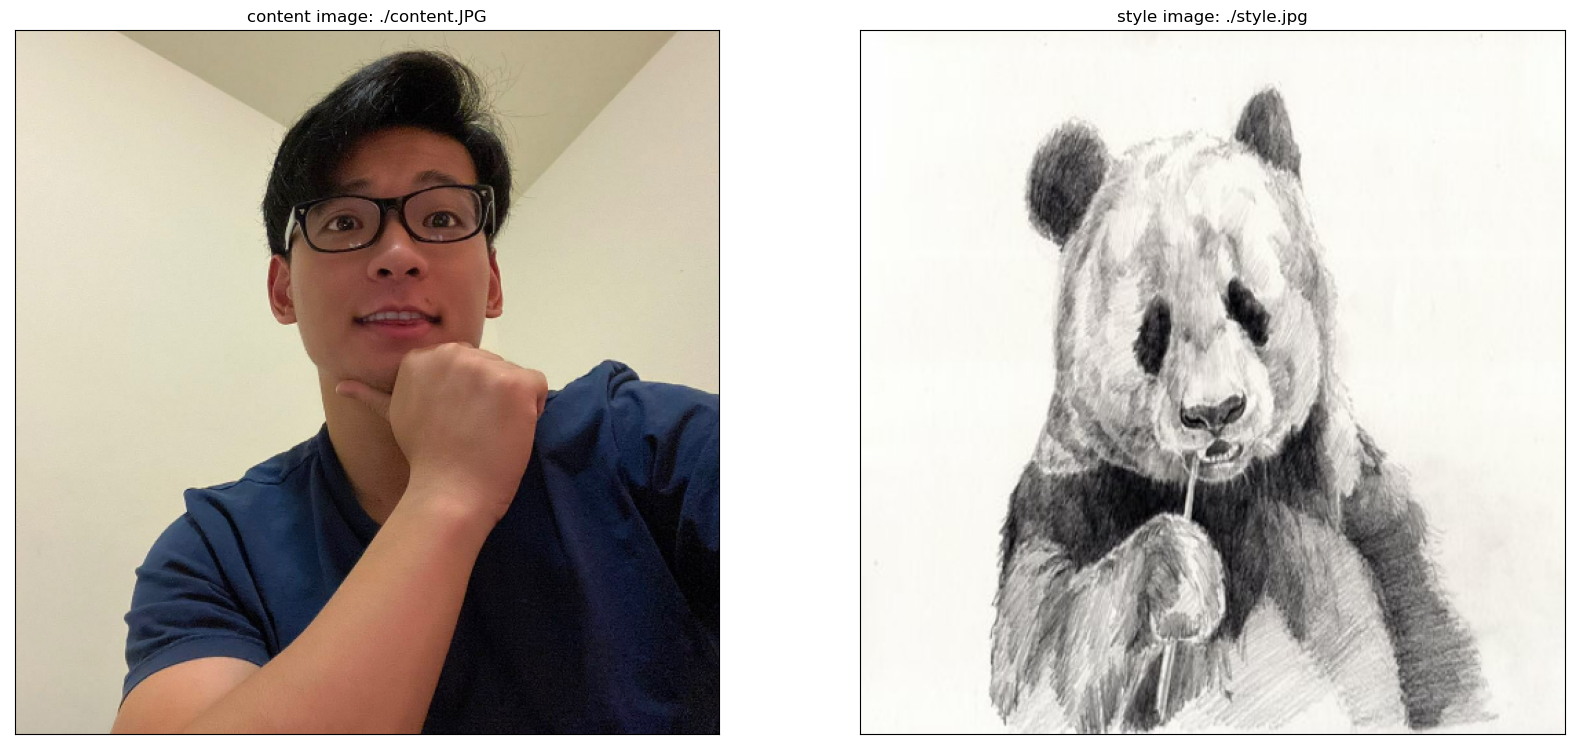

In [6]:
# display the content and style image
content_image, style_image = load_images(content_path, style_path)
show_images_with_objects([content_image, style_image], 
                         titles=[f'content image: {content_path}', f'style image: {style_path}'])

In [7]:
# this will take a few minutes to load
module_handle = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
hub_module = hub.load(module_handle)

In [10]:
# stylize the image using the model you just downloaded
stylized_image = hub_module(tf.image.convert_image_dtype(content_image, tf.float32), 
                            tf.image.convert_image_dtype(style_image, tf.float32))[0]

# convert the tensor to image
img = tensor_to_image(stylized_image)

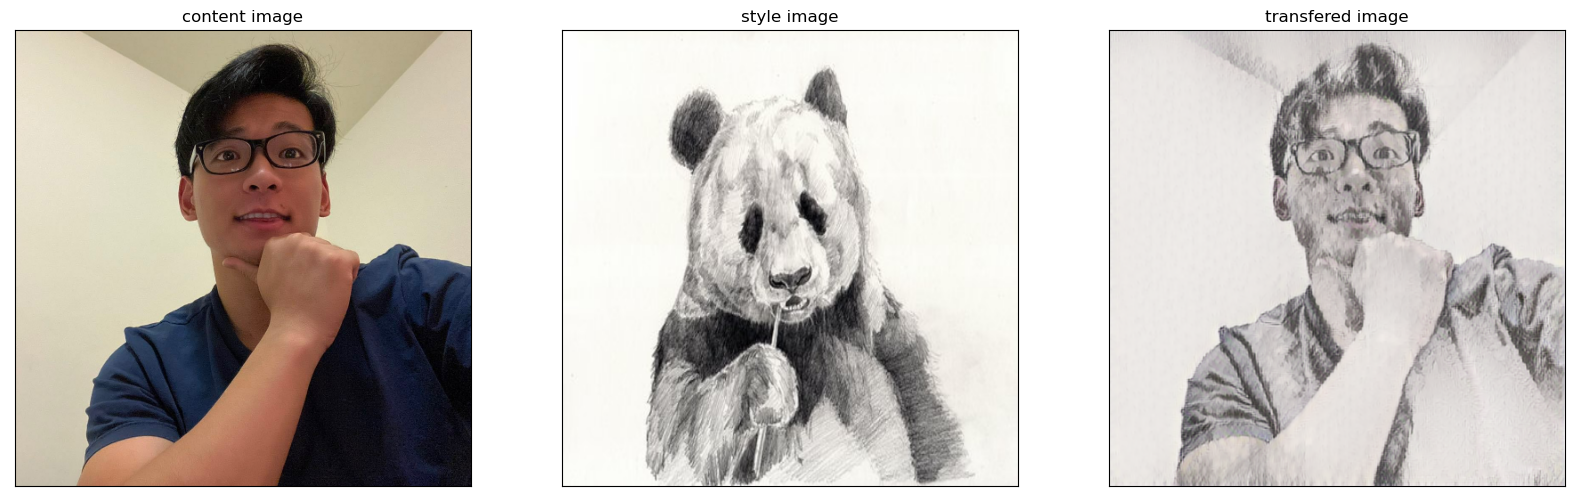

In [11]:
show_images_with_objects([content_image, style_image, stylized_image[0,:,:,:]], 
                         titles=['content image', 'style image', 'transfered image'])
# img.save("transfered_img.jpg")